<a href="https://colab.research.google.com/github/atharvak-3000/ak/blob/main/PlacementPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv('/content/placement.csv')

In [16]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [18]:
#removing useless column
df = df.iloc[:,1:]

In [19]:
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [20]:
import matplotlib.pyplot as plt


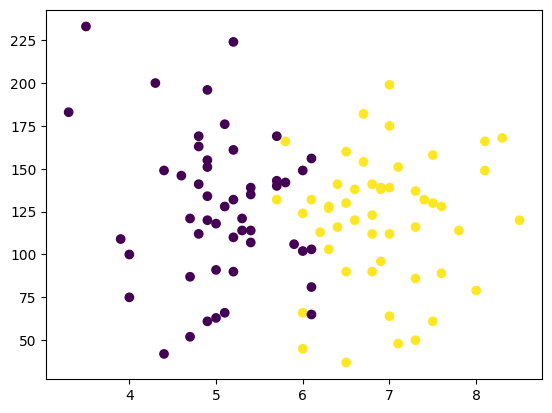

In [22]:
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])

In [ ]:
#eda
#we can use logistics regression here
#feature selection
#not needed here


In [27]:
#extracting input and output
X = df.iloc[:,0:2]
Y = df.iloc[:,-1:]

In [24]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [28]:
Y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [31]:
X_train

,cgpa,iq
92,5.2,110.0
69,8.5,120.0
75,4.8,169.0
18,4.0,100.0
56,6.1,65.0
...,...,...
79,6.5,90.0
91,7.5,158.0
8,6.1,156.0
78,6.1,81.0


In [32]:
Y_train

,placement
92,0
69,1
75,0
18,0
56,0
...,...
79,1
91,1
8,0
78,0


In [33]:
#scaling values
from sklearn.preprocessing import StandardScaler


In [36]:
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [40]:
X_train

array([[-0.65037323, -0.3259778 ],
       [ 2.21126898, -0.08391508],
       [-0.99723895,  1.10219225],
       [-1.69097039, -0.56804052],
       [ 0.13007465, -1.41526004],
       [-2.29798541,  1.44108006],
       [ 0.13007465,  0.20656019],
       [-0.91052252, -1.51208512],
       [ 0.39022394,  0.42441664],
       [ 0.99723895,  0.66647936],
       [ 0.82380609,  0.37600409],
       [ 0.82380609, -0.6648656 ],
       [-0.91052252,  0.25497273],
       [-0.47694037, -0.22915271],
       [ 1.17067181, -0.18074016],
       [ 0.30350751, -0.4954217 ],
       [-0.65037323,  2.43353721],
       [-0.65037323, -0.81010324],
       [-1.34410467,  0.61806681],
       [-1.17067181,  0.545448  ],
       [ 0.65037323,  0.73909817],
       [ 1.60425396, -0.22915271],
       [ 0.21679108, -0.25335898],
       [-1.77768682, -0.35018407],
       [-0.99723895,  0.95695462],
       [-0.91052252, -0.08391508],
       [ 1.17067181,  0.32759155],
       [-0.13007465,  0.44862291],
       [-0.47694037,

In [41]:
X_test = scaler.transform(X_test)

In [42]:
X_test

array([[-0.21679108,  0.40021036],
       [-0.5636568 , -0.22915271],
       [ 0.13007465, -0.4954217 ],
       [-0.21679108,  0.47282918],
       [-0.5636568 , -0.0597088 ],
       [ 1.4308211 ,  0.1097351 ],
       [ 1.34410467,  0.15814764],
       [ 0.91052252, -0.27756525],
       [-0.13007465,  1.02957344],
       [ 1.4308211 , -0.83430951]])

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf = LogisticRegression()

In [45]:
#training the model
clf.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [50]:
y_pred = clf.predict(X_test)

In [47]:
Y_test

,placement
36,0
46,0
14,0
6,0
2,0
30,1
83,1
29,1
85,1
42,1


In [48]:
from sklearn.metrics import accuracy_score


In [52]:
accuracy_score(Y_test,y_pred)

0.8

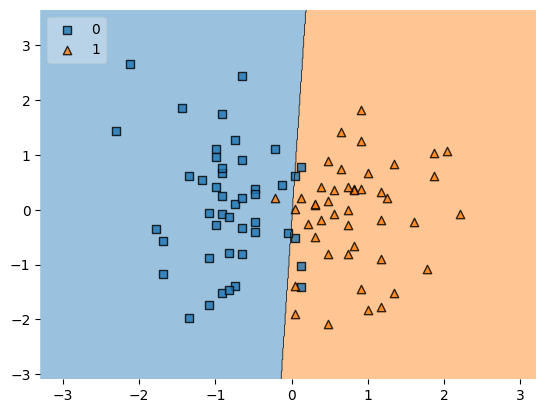

In [64]:
from mlxtend.plotting import plot_decision_regions
fig = plot_decision_regions(X_train,Y_train.values.squeeze(), clf=clf, legend=2)

In [65]:
import pickle

In [66]:
pickle.dump(clf,open('model.pkl','wb'))